In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "/content/Churn_Modelling .csv"

In [ ]:
df  = pd.read_csv(path)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.iloc[: , 3:13].values #we could have also used drop function but here we are using slicing
# by writing values we converted pandas x to numpy x

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
Y = df.iloc[: , 13].values

In [ ]:
Y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Importing the relevent libraries from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,2] = labelencoder.fit_transform(X[:,2])

X[:,1] = labelencoder.fit_transform(X[:,1])
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# get the library from sklearn.compose
from sklearn.compose import ColumnTransformer
#OneHot Encoder has been applied to column1
#I have given the column transformer function a name of my choice which is country
# The functionality has been passed onto the variable ct but still not applied on the data
# Name, Functionality and column name
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
#we shall now apply it on the data
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
X = pd.DataFrame(X, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age","Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
# axis = 1 indicates where should Python look for the variable X1
X = X.drop("X1", axis = 1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
#splitting the dataset into the training set and test set
# The train_test_split library function is located in sklearn.model_selection
from sklearn.model_selection import train_test_split
#To ensure that all of us in this class have the same data under under Training and testing
# In this case it is 0
# What is random state? It is like SEED that we use in Excel
# It ensures that everyone in the class has the same set of data records in Train and in Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
#Feature Scaling
# To standardize the data get the StandardScalar function from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
# pass on the functionality to a new variable called sc
sc = StandardScaler()
# Standardize the data
# fit_transform is being done on the Xtrain data
# Model is learning the mean and variance from the train data aka fit
# After learning it is implementing it aka transform
X_train = sc.fit_transform(X_train)
# Model is using the mean and variance of the data and applying on the test data
# so no need to fit but only transform
X_test = sc.transform(X_test)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
##statsmodel in python forget to add the constatnt
## this is a violation of markov property
## this constant has to be added seperatly

classifier = sm.Logit(Y_train,X_train)
model = classifier.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.429005
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.1520
Time:                        07:21:08   Log-Likelihood:                -3432.0
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                4.787e-257
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6472      0.034    -47.855      0.000      -1.715      -1.580
x1             0.3563      0.033     10.900      0.000       0.292       0.420
x2             0.0484      0.034      1.435      0.151      -0.018       0.115
x3            -0.0724      0.030     -2.390      0.017      -0.132      -0.013
x4            -0.2695      0.030     -8.888      0.000      -0.329      -0.210
x5             0.7526      0.030     25.037      0.000       0.694       0.811
x6            -0.0814      0.030     -2.694      0.007      -0.141      -0.022
x7             0.1537      0.036      4.283      0.000       0.083       0.224
x8            -0.0848      0.031     -2.747      0.006      -0.145      -0.024
x9            -0.0237      0.030     -0.786      0.432      -0.083       0.035
x10           -0.5189      0.032    -16.205      0.000      -0.582      -0.456
x11            0.0292      0.030      0.960      0.337      -0.030       0.089
==============================================================================
"""

Accuracy 0.811


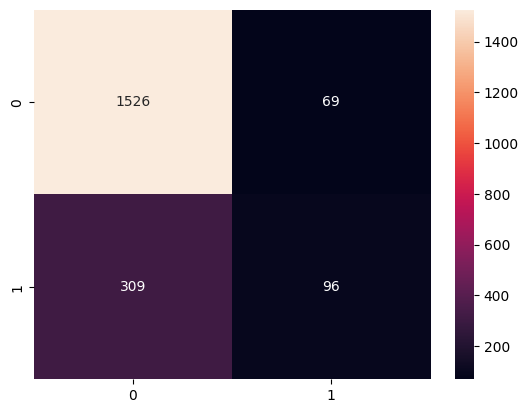

In [ ]:
import seaborn as sns
from sklearn import metrics
#predicting the Test set results
# Determine if the value is less than or more than the cut-off value
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, fmt='');